

---


***ASSIGNMENT***

---



**`Quadratic Assignment`**

**Objective functions**:

$f(P) = \sum_{i=1}^{n} \sum_{j=1}^{n} a_{ij} \cdot b_{P(i)P(j)}$

**Constraints**:

$\sum_{i=1}^{n} P(i,j) = 1 \quad \text{for } j = 1, 2, \ldots, n$

$\sum_{j=1}^{n} P(i,j) = 1 \quad \text{for } i = 1, 2, \ldots, n$


In [ ]:
import numpy as np
def ant_colony_optimization(W, D, colony_size=10, iterations=100, rho=0.1, alpha=1, beta=2, q0=0.9):
    n = len(W)
    pheromone = np.ones((n, n)) / n
    best_cost = float('inf')
    best_assignment = None
    def generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0):
        solutions = []
        for _ in range(colony_size):
            solution = construct_solution(pheromone, W, D, alpha, beta, q0)
            solutions.append(solution)
        return solutions
    def construct_solution(pheromone, W, D, alpha, beta, q0):
        n = len(W)
        solution = np.zeros((n, n))
        unassigned_facilities = set(range(n))
        for i in range(n):
            current_location = i
            current_facility = choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
            solution[i, current_facility] = 1
            unassigned_facilities.remove(current_facility)
        return solution
    def choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
        selected_facility = np.random.choice(list(unassigned_facilities), p=probabilities)
        return selected_facility
    def calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = np.zeros(len(unassigned_facilities))
        for i, facility in enumerate(unassigned_facilities):
            pheromone_factor = pheromone[current_location, facility] ** alpha
            weight_distance_factor = np.sum(W * D[:, [facility]], axis=1) ** beta
            max_weight_distance_factor = weight_distance_factor.max()
            if max_weight_distance_factor == 0:
                probabilities[i] = 0
            else:
                probabilities[i] = pheromone_factor / max_weight_distance_factor
        probabilities /= probabilities.sum()
        return probabilities
    def pheromone_update(pheromone, solutions, W, D, rho):
        pheromone *= (1 - rho)
        for solution, cost in solutions:
            pheromone += solution / cost
    for _ in range(iterations):
        solutions = generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0)
        for solution in solutions:
            cost = np.trace(np.dot(np.dot(W, solution), D.T))
            if cost < best_cost:
                best_cost = cost
                best_assignment = solution
        pheromone_update(pheromone, [(solution, np.trace(np.dot(np.dot(W, solution), D.T))) for solution in solutions], W, D, rho)
    return best_assignment, best_cost
L = 5
P = 5
W = np.random.rand(P, P)
D = np.random.rand(L, L)
best_assignment, best_cost = ant_colony_optimization(W, D)
print("Best Assignment =")
print(best_assignment)
print("Best Cost =", best_cost)

Best Assignment =
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
Best Cost = 6.60780384759558


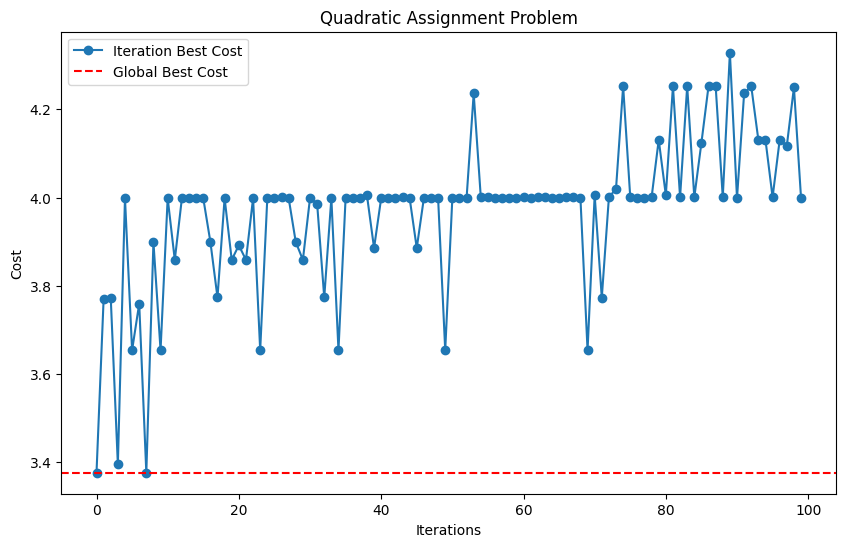

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_evolution(iteration_costs, best_costs):
    plt.figure(figsize=(10, 6))
    plt.plot(iteration_costs, label='Iteration Best Cost', marker='o')
    plt.axhline(y=min(best_costs), color='r', linestyle='--', label='Global Best Cost')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Quadratic Assignment Problem')
    plt.legend()
    plt.show()
def ant_colony_optimization(W, D, colony_size=10, iterations=100, rho=0.1, alpha=1, beta=2, q0=0.9):
    n = len(W)
    pheromone = np.ones((n, n)) / n
    best_cost = float('inf')
    best_costs = []
    iteration_costs = []
    def generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0):
        solutions = []
        for _ in range(colony_size):
            solution = construct_solution(pheromone, W, D, alpha, beta, q0)
            solutions.append(solution)
        return solutions
    def construct_solution(pheromone, W, D, alpha, beta, q0):
        n = len(W)
        solution = np.zeros((n, n))
        unassigned_facilities = set(range(n))
        for i in range(n):
            current_location = i
            current_facility = choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
            solution[i, current_facility] = 1
            unassigned_facilities.remove(current_facility)
        return solution
    def choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
        selected_facility = np.random.choice(list(unassigned_facilities), p=probabilities)
        return selected_facility
    def calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = np.zeros(len(unassigned_facilities))
        for i, facility in enumerate(unassigned_facilities):
            pheromone_factor = pheromone[current_location, facility] ** alpha
            weight_distance_factor = np.sum(W * D[:, [facility]], axis=1) ** beta
            max_weight_distance_factor = weight_distance_factor.max()
            if max_weight_distance_factor == 0:
                probabilities[i] = 0
            else:
                probabilities[i] = pheromone_factor / max_weight_distance_factor
        probabilities /= probabilities.sum()
        return probabilities
    def pheromone_update(pheromone, solutions, W, D, rho):
        pheromone *= (1 - rho)
        for solution, cost in solutions:
            pheromone += solution / cost
    for iteration in range(iterations):
        solutions = generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0)
        iteration_best_cost = min([np.trace(np.dot(np.dot(W, solution), D.T)) for solution in solutions])
        iteration_costs.append(iteration_best_cost)
        if iteration_best_cost < best_cost:
            best_cost = iteration_best_cost
        pheromone_update(pheromone, [(solution, np.trace(np.dot(np.dot(W, solution), D.T))) for solution in solutions], W, D, rho)
        best_costs.append(best_cost)
    return best_costs, iteration_costs
L = 5
P = 5
W = np.random.rand(P, P)
D = np.random.rand(L, L)
best_costs, iteration_costs = ant_colony_optimization(W, D)
plot_evolution(iteration_costs, best_costs)

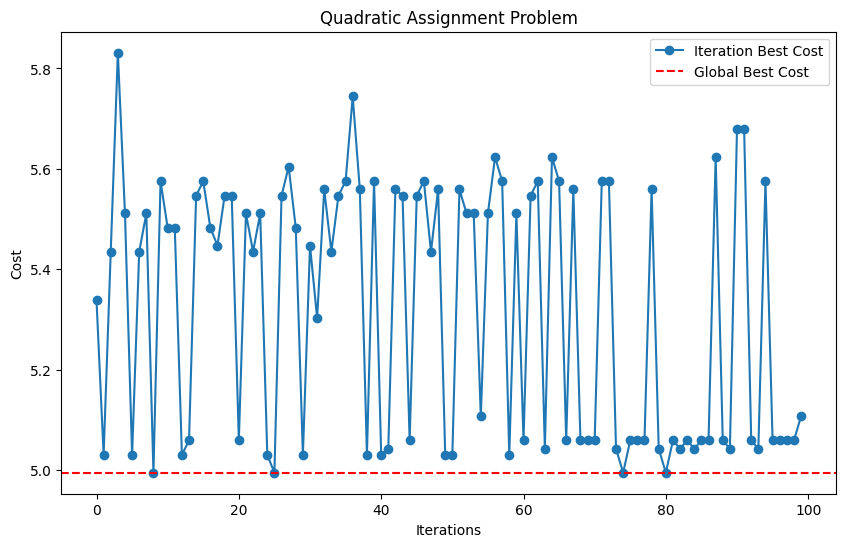



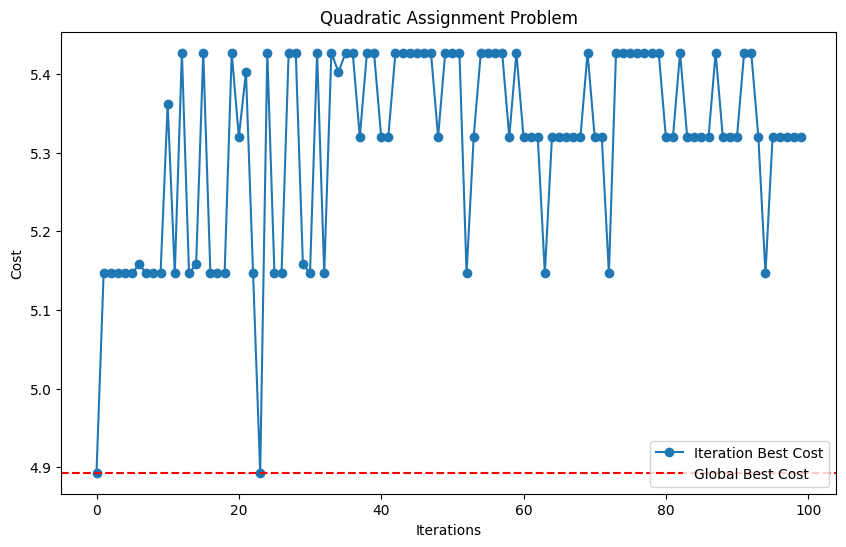

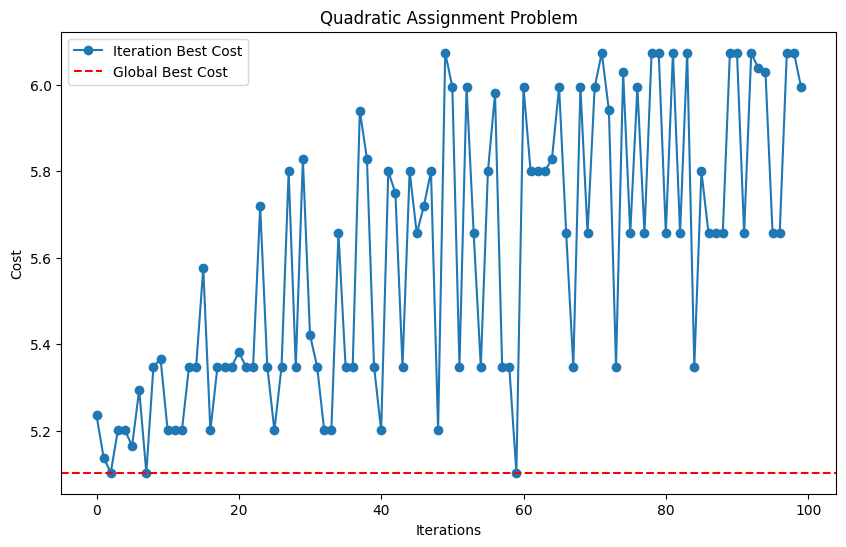

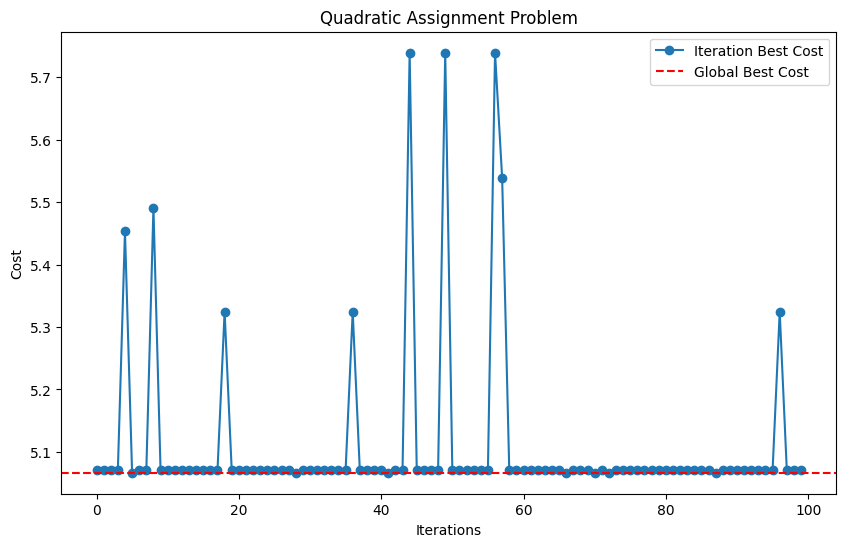

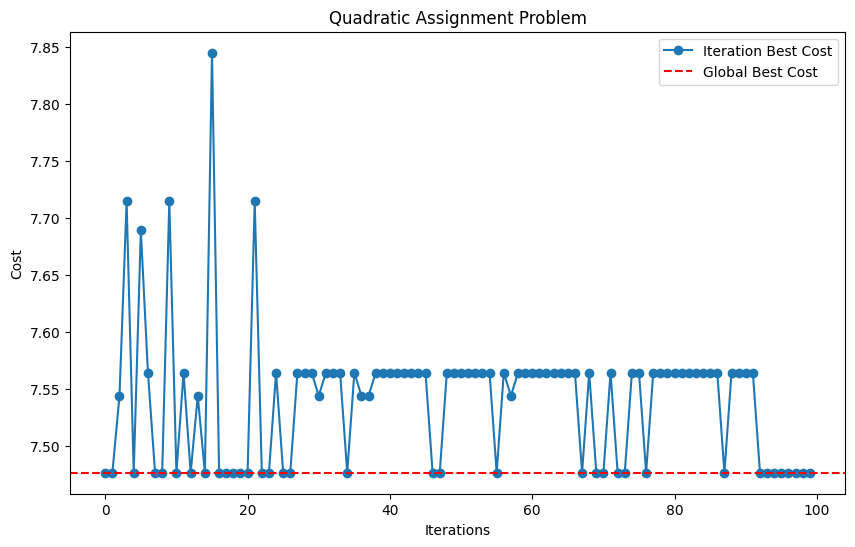

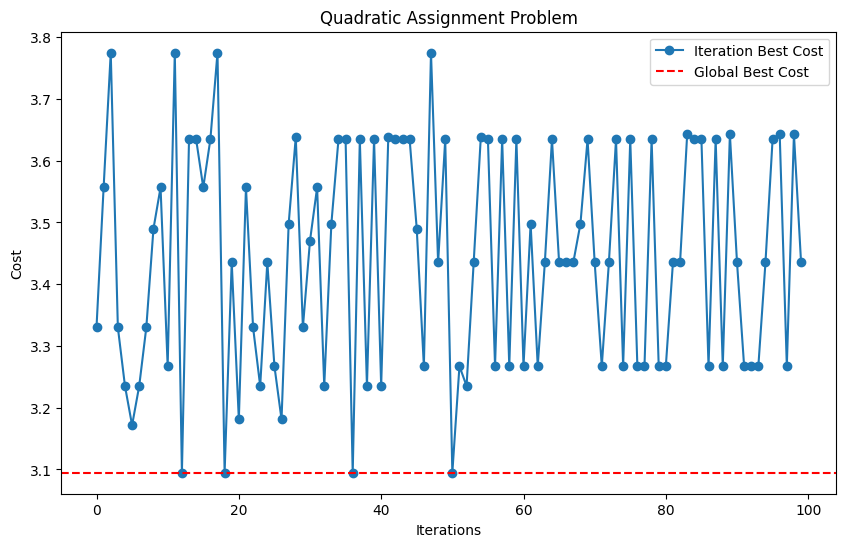

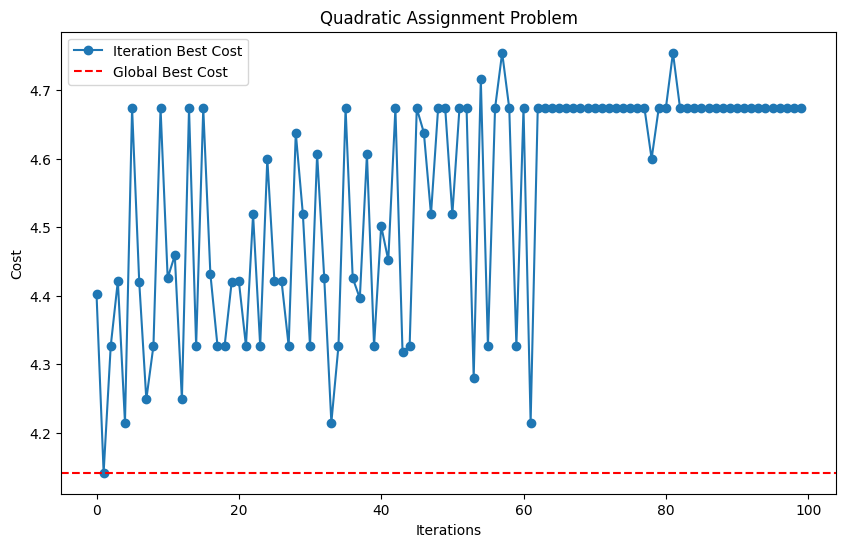

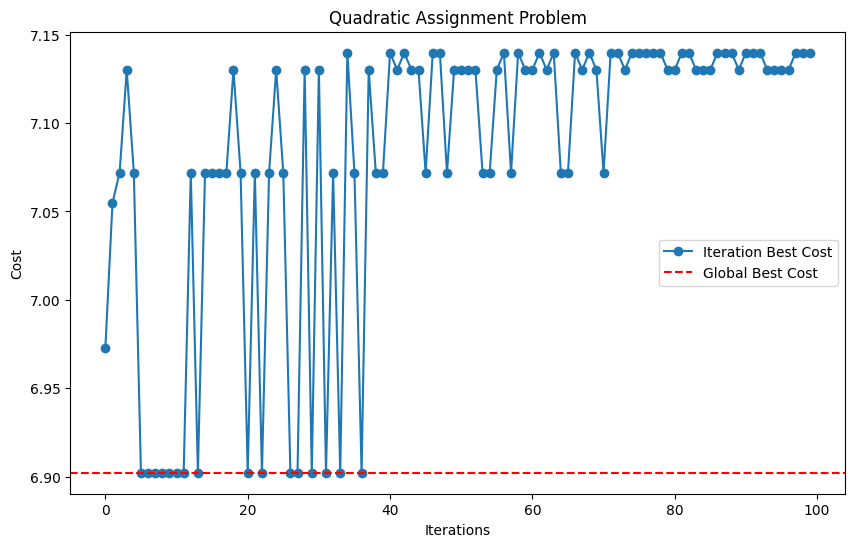

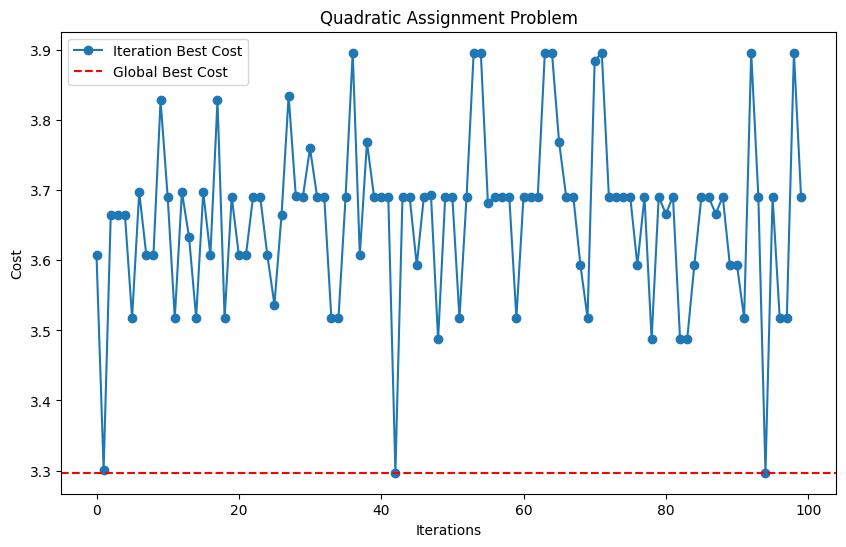

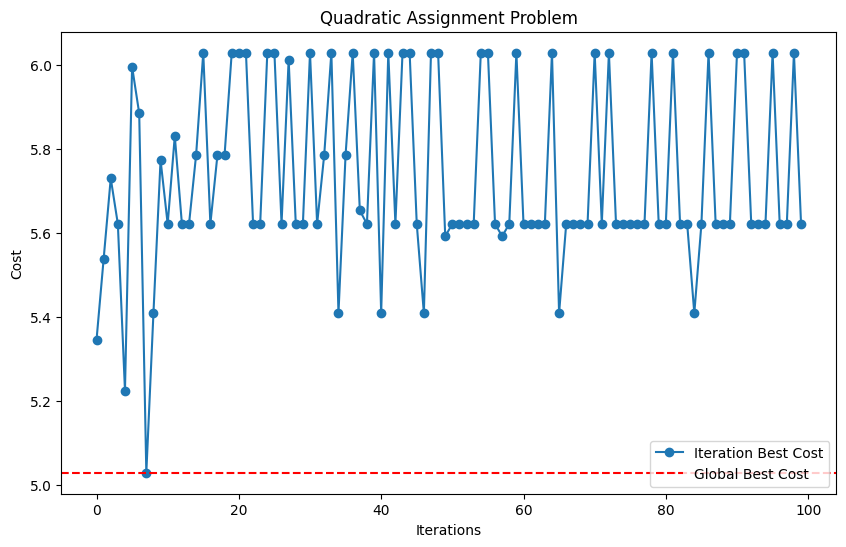

In [ ]:
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
!pip install pygraphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.12-cp310-cp310-linux_x86_64.whl size=168137 sha256=a1e36c3913714e285d0eedcecff5818d301e924df511a07a9d0798e56a9a9eda
  Stored in directory: /root/.cache/pip/wheels/1d/ee/b5/a2f54f9e9b3951599c05dcce270ca85e472f8e6cec470e397a
Successfully built pygraphviz


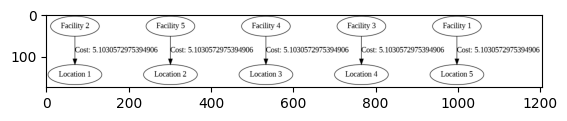

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
def ant_colony_optimization(W, D, colony_size=10, iterations=100, rho=0.1, alpha=1, beta=2, q0=0.9):
    n = len(W)
    pheromone = np.ones((n, n)) / n
    best_cost = float('inf')
    best_assignment = None
    def generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0):
        solutions = []
        for _ in range(colony_size):
            solution = construct_solution(pheromone, W, D, alpha, beta, q0)
            solutions.append(solution)
        return solutions
    def construct_solution(pheromone, W, D, alpha, beta, q0):
        n = len(W)
        solution = np.zeros((n, n))
        unassigned_facilities = set(range(n))
        for i in range(n):
            current_location = i
            current_facility = choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
            solution[i, current_facility] = 1
            unassigned_facilities.remove(current_facility)
        return solution
    def choose_next_facility(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0)
        selected_facility = np.random.choice(list(unassigned_facilities), p=probabilities)
        return selected_facility
    def calculate_probabilities(pheromone, W, D, solution, current_location, unassigned_facilities, alpha, beta, q0):
        n = len(W)
        probabilities = np.zeros(len(unassigned_facilities))
        for i, facility in enumerate(unassigned_facilities):
            pheromone_factor = pheromone[current_location, facility] ** alpha
            weight_distance_factor = np.sum(W * D[:, [facility]], axis=1) ** beta
            max_weight_distance_factor = weight_distance_factor.max()
            if max_weight_distance_factor == 0:
                probabilities[i] = 0
            else:
                probabilities[i] = pheromone_factor / max_weight_distance_factor
        probabilities /= probabilities.sum()
        return probabilities
    def pheromone_update(pheromone, solutions, W, D, rho):
        pheromone *= (1 - rho)
        for solution, cost in solutions:
            pheromone += solution / cost
    for _ in range(iterations):
        solutions = generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0)
        for solution in solutions:
            cost = np.trace(np.dot(np.dot(W, solution), D.T))
            if cost < best_cost:
                best_cost = cost
                best_assignment = solution
        pheromone_update(pheromone, [(solution, np.trace(np.dot(np.dot(W, solution), D.T))) for solution in solutions], W, D, rho)
    return best_assignment, best_cost
def visualize_assignment(assignment, cost):
    G = pgv.AGraph(strict=True, directed=True)
    for i, row in enumerate(assignment):
        for j, assignment_value in enumerate(row):
            if assignment_value == 1:
                G.add_edge(f"Facility {j+1}", f"Location {i+1}", label=f"Cost: {cost}")
    G.layout(prog='dot')
    G.draw('qap_solution.png')
    plt.imshow(plt.imread('qap_solution.png'))
    plt.show()
L = 5
P = 5
W = np.random.rand(P, P)
D = np.random.rand(L, L)
best_assignment, best_cost = ant_colony_optimization(W, D)
visualize_assignment(best_assignment, best_cost)

Arrangement of electronic components into moiocrochip using QAP

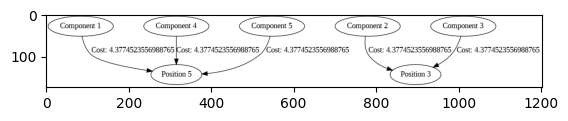

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
def ant_colony_optimization(W, D, colony_size=10, iterations=100, rho=0.1, alpha=1, beta=2, q0=0.9):
    n = len(W)
    pheromone = np.ones((n, n)) / n
    best_cost = float('inf')
    best_assignment = None
    def generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0):
        solutions = []
        for _ in range(colony_size):
            solution = construct_solution(pheromone, W, D, alpha, beta, q0)
            solutions.append(solution)
        return solutions
    def construct_solution(pheromone, W, D, alpha, beta, q0):
        n = len(W)
        solution = np.zeros((n, n))
        unassigned_components = set(range(n))
        for i in range(n):
            current_component = i
            current_position = choose_next_position(pheromone, W, D, solution, current_component, unassigned_components, alpha, beta, q0)
            solution[i, current_position] = 1
            unassigned_components.remove(current_component)
        return solution
    def choose_next_position(pheromone, W, D, solution, current_component, unassigned_components, alpha, beta, q0):
        n = len(W)
        probabilities = calculate_probabilities(pheromone, W, D, solution, current_component, unassigned_components, alpha, beta, q0)
        selected_position = np.random.choice(list(unassigned_components), p=probabilities)
        return selected_position
    def calculate_probabilities(pheromone, W, D, solution, current_component, unassigned_components, alpha, beta, q0):
        n = len(W)
        probabilities = np.zeros(len(unassigned_components))
        for i, position in enumerate(unassigned_components):
            pheromone_factor = pheromone[current_component, position] ** alpha
            connection_cost_factor = (W * D[:, position]).sum(axis=1) ** beta
            max_connection_cost_factor = connection_cost_factor.max()
            if max_connection_cost_factor == 0:
                probabilities[i] = 0
            else:
                probabilities[i] = pheromone_factor / max_connection_cost_factor
        probabilities /= probabilities.sum()
        return probabilities
    def pheromone_update(pheromone, solutions, W, D, rho):
        pheromone *= (1 - rho)
        for solution, cost in solutions:
            pheromone += solution / cost
    for _ in range(iterations):
        solutions = generate_solutions(colony_size, pheromone, W, D, alpha, beta, q0)
        for solution in solutions:
            cost = np.trace(np.dot(np.dot(W, solution), D.T))
            if cost < best_cost:
                best_cost = cost
                best_assignment = solution
        pheromone_update(pheromone, [(solution, np.trace(np.dot(np.dot(W, solution), D.T))) for solution in solutions], W, D, rho)
    return best_assignment, best_cost
num_components = 5
num_positions = 5
W = np.random.rand(num_components, num_components)
D = np.random.rand(num_positions, num_positions)
best_assignment, best_cost = ant_colony_optimization(W, D)
def visualize_assignment(assignment, cost):
    G = pgv.AGraph(strict=True, directed=True)
    for i, row in enumerate(assignment):
        for j, assignment_value in enumerate(row):
            if assignment_value == 1:
                G.add_edge(f"Component {i+1}", f"Position {j+1}", label=f"Cost: {cost}")
    G.layout(prog='dot')
    G.draw('microchip_arrangement_QAP.png')
    plt.imshow(plt.imread('microchip_arrangement_QAP.png'))
    plt.show()
visualize_assignment(best_assignment, best_cost)

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go
def visualize_assignment_plotly(assignment, cost):
    num_components, num_positions = assignment.shape
    fig = go.Figure()
    for i in range(num_components):
        for j in range(num_positions):
            if assignment[i, j] == 1:
                fig.add_trace(go.Scatter(x=[j], y=[i], mode='markers+text', marker=dict(size=40, symbol='circle', color='green'),
                                         text=f"Component {i+1}<br>Position {j+1}<br>Cost: {cost}",
                                         textposition="top center"))
    fig.update_layout(title_text="QAP-Microchip Arrangement", showlegend=False)
    fig.show()
num_components = 5
num_positions = 5
W = np.random.rand(num_components, num_components)
D = np.random.rand(num_positions, num_positions)
best_assignment, best_cost = ant_colony_optimization(W, D)
visualize_assignment_plotly(best_assignment, best_cost)

**`Generalized Assignment Problem`**

**Parameters**:

$(1)$ $n$ tasks indexed by $i = 1, 2, ..., n$

$(2)$ $m$ agents indexed by$j = 1, 2, ..., m$

$(3)$ $c_{ij}$ = cost (or profit) associated with assigning task $i$ to agent $j$
  
$(4)$ $a_i$ = represents the capacity of task $i$, i.e., the maximum number of times task $i$ can be assigned.

**Objective**: To find a binary assignment matrix $x_{ij}$ where

$(1)$ $x_{ij}=1$ (if task $i$ is assigned to agent $j$)

$(2)$ $x_{ij}=0$ (otherwise)

**Constraints**:

$\sum_{j=1}^{m} x_{ij} \leq a_i \quad \forall i$

 and

$\sum_{i=1}^{n} x_{ij} \leq b_j \quad \forall j$

where $x_{ij} \in \{0, 1\} \quad \forall i, j$

**Minimize**: $\sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} \cdot x_{ij}$

In [ ]:
import numpy as np
class AntColony:
    def __init__(self, n_ants, n_items, n_bins, profits, weights, budgets, alpha=1, beta=2, rho=0.5, q0=0.7, iterations=100):
        self.n_ants = n_ants
        self.n_items = n_items
        self.n_bins = n_bins
        self.profits = profits
        self.weights = weights
        self.budgets = budgets
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0
        self.iterations = iterations
        self.pheromones = np.ones((n_bins, n_items)) / n_bins
        self.best_solution = None
        self.best_profit = float('-inf')
    def run(self):
        for iteration in range(self.iterations):
            solutions = self.generate_solutions()
            self.update_pheromones(solutions)
            self.update_best_solution(solutions)
        return self.best_solution
    def generate_solutions(self):
        solutions = []
        for ant in range(self.n_ants):
            solution = self.construct_solution()
            solutions.append((solution, self.calculate_solution_profit(solution)))
        return solutions
    def construct_solution(self):
        solution = np.zeros((self.n_bins, self.n_items))
        for item in range(self.n_items):
            probabilities = self.calculate_probabilities(item)
            bin_chosen = self.choose_bin(probabilities)
            solution[bin_chosen, item] = 1
        return solution
    def calculate_probabilities(self, item):
        probabilities = np.zeros(self.n_bins)
        for bin_idx in range(self.n_bins):
            if np.sum(self.weights[bin_idx] * self.pheromones[bin_idx]) <= self.budgets[bin_idx]:
                probabilities[bin_idx] = (self.pheromones[bin_idx, item] ** self.alpha) * ((1 / self.weights[bin_idx, item]) ** self.beta)
            else:
                probabilities[bin_idx] = 0
        probabilities /= np.sum(probabilities)
        return probabilities
    def choose_bin(self, probabilities):
        if np.random.rand() < self.q0:
            return np.argmax(probabilities)
        else:
            return np.random.choice(range(self.n_bins), p=probabilities)
    def calculate_solution_profit(self, solution):
        profit = np.sum(solution * self.profits)
        return profit
    def update_pheromones(self, solutions):
        self.pheromones *= (1 - self.rho)
        for solution, solution_profit in solutions:
            for bin_idx in range(self.n_bins):
                items_assigned = np.where(solution[bin_idx] == 1)[0]
                if np.sum(self.weights[bin_idx, items_assigned]) <= self.budgets[bin_idx]:
                    self.pheromones[bin_idx, items_assigned] += (1 / solution_profit)
    def update_best_solution(self, solutions):
        for solution, solution_profit in solutions:
            if solution_profit > self.best_profit:
                self.best_solution = solution.copy()
                self.best_profit = solution_profit
n_ants = 10
n_items = 5
n_bins = 3
profits = np.random.randint(1, 10, size=(n_bins, n_items))
weights = np.random.randint(1, 5, size=(n_bins, n_items))
budgets = np.random.randint(10, 20, size=n_bins)
ant_colony = AntColony(n_ants, n_items, n_bins, profits, weights, budgets)
best_solution = ant_colony.run()
print("Best Solution:")
print(best_solution)
print("Best Profit:", ant_colony.best_profit)

Best Solution:
[[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]]
Best Profit: 31.0


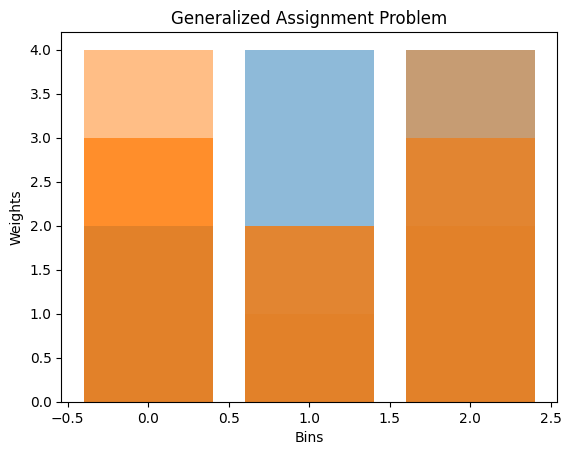

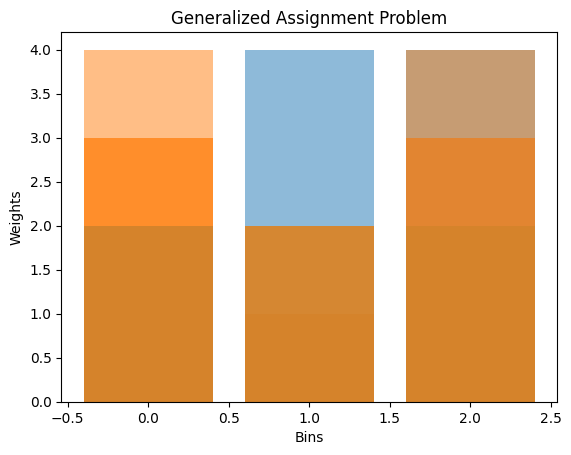

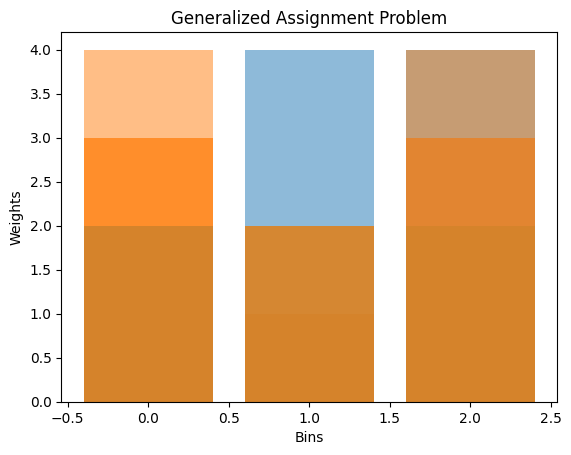

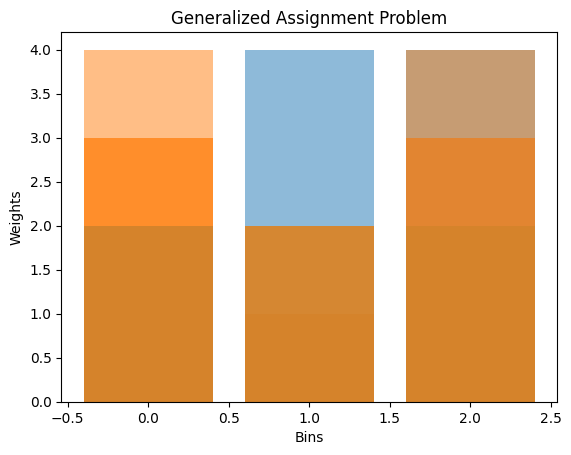

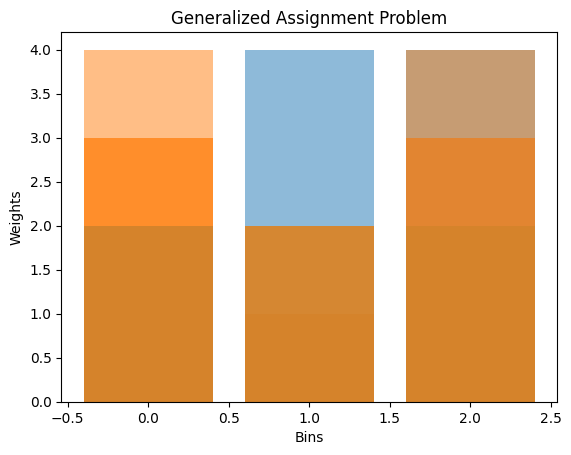

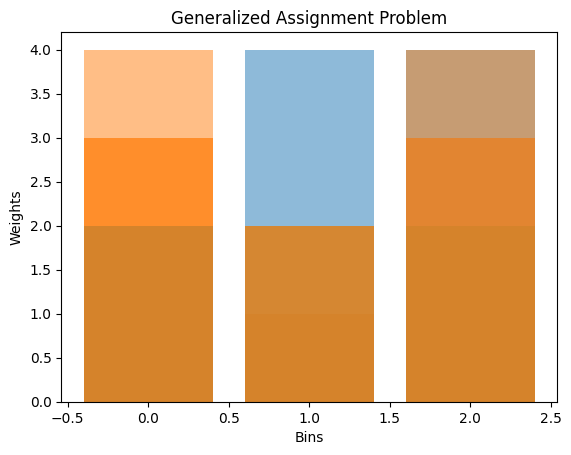

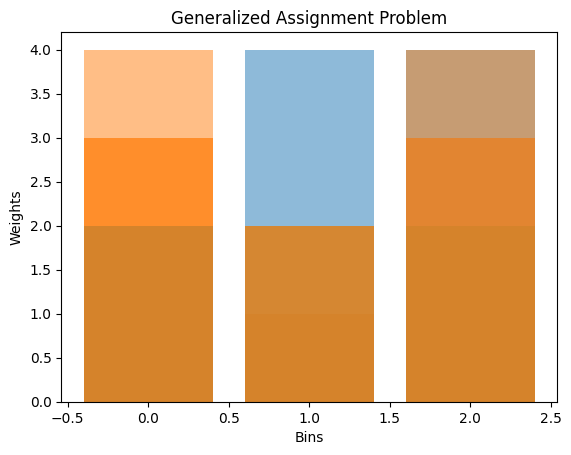

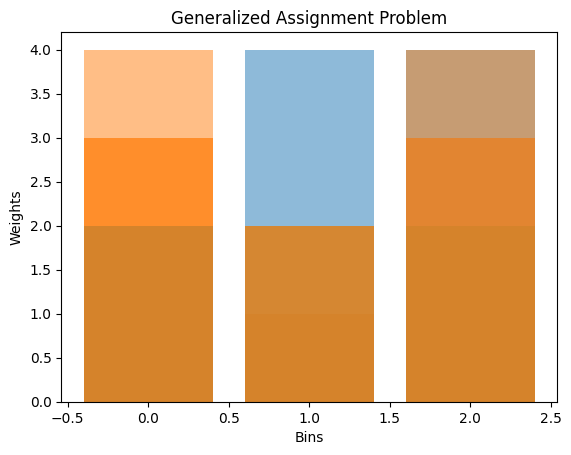

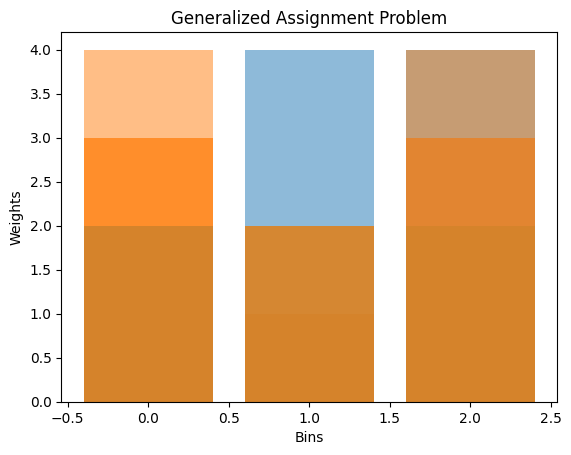

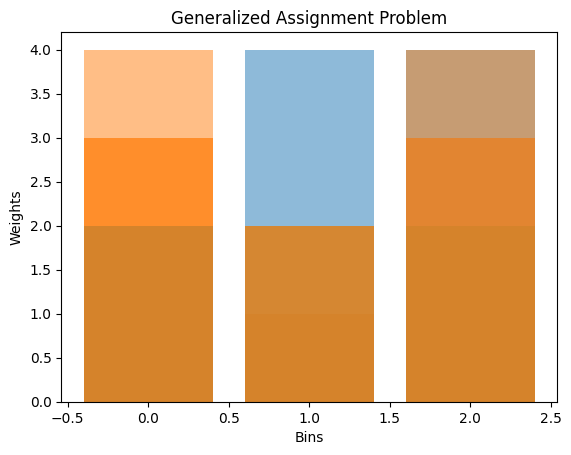

Best Solution =
[[0. 0. 1. 0. 0.]
 [1. 0. 0. 1. 1.]
 [0. 1. 0. 0. 0.]]
Best Profit = 31.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class AntColony:
    def __init__(self, n_ants, n_items, n_bins, profits, weights, budgets, alpha=1, beta=2, rho=0.5, q0=0.7, iterations=100):
        self.n_ants = n_ants
        self.n_items = n_items
        self.n_bins = n_bins
        self.profits = profits
        self.weights = weights
        self.budgets = budgets
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0
        self.iterations = iterations
        self.pheromones = np.ones((n_bins, n_items)) / n_bins
        self.best_solution = None
        self.best_profit = float('-inf')
    def run(self):
        for iteration in range(self.iterations):
            solutions = self.generate_solutions()
            self.update_pheromones(solutions)
            self.update_best_solution(solutions)
            if iteration % 10 == 0:
                self.visualize_solution(self.best_solution)
        return self.best_solution
    def generate_solutions(self):
        solutions = []
        for ant in range(self.n_ants):
            solution = self.construct_solution()
            solutions.append((solution, self.calculate_solution_profit(solution)))
        return solutions
    def construct_solution(self):
        solution = np.zeros((self.n_bins, self.n_items))
        for item in range(self.n_items):
            probabilities = self.calculate_probabilities(item)
            bin_chosen = self.choose_bin(probabilities)
            solution[bin_chosen, item] = 1
        return solution
    def calculate_probabilities(self, item):
        probabilities = np.zeros(self.n_bins)
        for bin_idx in range(self.n_bins):
            if np.sum(self.weights[bin_idx] * self.pheromones[bin_idx]) <= self.budgets[bin_idx]:
                probabilities[bin_idx] = (self.pheromones[bin_idx, item] ** self.alpha) * ((1 / self.weights[bin_idx, item]) ** self.beta)
            else:
                probabilities[bin_idx] = 0
        probabilities /= np.sum(probabilities)
        return probabilities
    def choose_bin(self, probabilities):
        if np.random.rand() < self.q0:
            return np.argmax(probabilities)
        else:
            return np.random.choice(range(self.n_bins), p=probabilities)
    def calculate_solution_profit(self, solution):
        profit = np.sum(solution * self.profits)
        return profit
    def update_pheromones(self, solutions):
        self.pheromones *= (1 - self.rho)
        for solution, solution_profit in solutions:
            for bin_idx in range(self.n_bins):
                items_assigned = np.where(solution[bin_idx] == 1)[0]
                if np.sum(self.weights[bin_idx, items_assigned]) <= self.budgets[bin_idx]:
                    self.pheromones[bin_idx, items_assigned] += (1 / solution_profit)
    def update_best_solution(self, solutions):
        for solution, solution_profit in solutions:
            if solution_profit > self.best_profit:
                self.best_solution = solution.copy()
                self.best_profit = solution_profit
    def visualize_solution(self, solution):
        bins = np.arange(self.n_bins)
        colors = ['C' + str(i) for i in range(self.n_bins)]
        for item_idx in range(self.n_items):
            assigned_bin = np.where(solution[:, item_idx] == 1)[0][0]
            plt.bar(bins, self.weights[:, item_idx], bottom=np.zeros(self.n_bins), color=colors[assigned_bin], alpha=0.5)
        plt.xlabel('Bins')
        plt.ylabel('Weights')
        plt.title('Generalized Assignment Problem')
        plt.show()
n_ants = 10
n_items = 5
n_bins = 3
profits = np.random.randint(1, 10, size=(n_bins, n_items))
weights = np.random.randint(1, 5, size=(n_bins, n_items))
budgets = np.random.randint(10, 20, size=n_bins)
ant_colony = AntColony(n_ants, n_items, n_bins, profits, weights, budgets)
best_solution = ant_colony.run()
print("Best Solution =")
print(best_solution)
print("Best Profit =", ant_colony.best_profit)

In [ ]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image
class AntColony:
    def __init__(self, n_ants, n_items, n_bins, profits, weights, budgets, alpha=1, beta=2, rho=0.5, q0=0.7, iterations=100):
        self.n_ants = n_ants
        self.n_items = n_items
        self.n_bins = n_bins
        self.profits = profits
        self.weights = weights
        self.budgets = budgets
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.q0 = q0
        self.iterations = iterations
        self.pheromones = np.ones((n_bins, n_items)) / n_bins
        self.best_solution = None
        self.best_profit = float('-inf')
    def run(self):
        for iteration in range(self.iterations):
            solutions = self.generate_solutions()
            self.update_pheromones(solutions)
            self.update_best_solution(solutions)
            if iteration % 10 == 0:  # Visualize every 10 iterations
                self.visualize_solution(self.best_solution, iteration)
        return self.best_solution
    def generate_solutions(self):
        solutions = []
        for ant in range(self.n_ants):
            solution = self.construct_solution()
            solutions.append((solution, self.calculate_solution_profit(solution)))
        return solutions
    def construct_solution(self):
        solution = np.zeros((self.n_bins, self.n_items))
        for item in range(self.n_items):
            probabilities = self.calculate_probabilities(item)
            bin_chosen = self.choose_bin(probabilities)
            solution[bin_chosen, item] = 1
        return solution
    def calculate_probabilities(self, item):
        probabilities = np.zeros(self.n_bins)
        for bin_idx in range(self.n_bins):
            if np.sum(self.weights[bin_idx] * self.pheromones[bin_idx]) <= self.budgets[bin_idx]:
                probabilities[bin_idx] = (self.pheromones[bin_idx, item] ** self.alpha) * ((1 / self.weights[bin_idx, item]) ** self.beta)
            else:
                probabilities[bin_idx] = 0
        probabilities /= np.sum(probabilities)
        return probabilities
    def choose_bin(self, probabilities):
        if np.random.rand() < self.q0:
            return np.argmax(probabilities)
        else:
            return np.random.choice(range(self.n_bins), p=probabilities)
    def calculate_solution_profit(self, solution):
        profit = np.sum(solution * self.profits)
        return profit
    def update_pheromones(self, solutions):
        self.pheromones *= (1 - self.rho)
        for solution, solution_profit in solutions:
            for bin_idx in range(self.n_bins):
                items_assigned = np.where(solution[bin_idx] == 1)[0]
                if np.sum(self.weights[bin_idx, items_assigned]) <= self.budgets[bin_idx]:
                    self.pheromones[bin_idx, items_assigned] += (1 / solution_profit)
    def update_best_solution(self, solutions):
        for solution, solution_profit in solutions:
            if solution_profit > self.best_profit:
                self.best_solution = solution.copy()
                self.best_profit = solution_profit
    def visualize_solution(self, solution, iteration):
        graph = pgv.AGraph(directed=True)
        for bin_idx in range(self.n_bins):
            bin_node = f"Bin_{bin_idx}"
            graph.add_node(bin_node, label=f"Budget: {self.budgets[bin_idx]}")
        for item_idx in range(self.n_items):
            item_node = f"Item_{item_idx}"
            graph.add_node(item_node, label=f"Weight: {np.sum(self.weights[:, item_idx])}")
            assigned_bin = np.where(solution[:, item_idx] == 1)[0][0]
            edge_label = f"Profit: {self.profits[assigned_bin, item_idx]}"
            graph.add_edge(f"Bin_{assigned_bin}", item_node, label=edge_label)
        filename = f"iteration_{iteration}.png"
        graph.draw(filename, prog='dot', format='png')
        Image(filename)
n_ants = 10
n_items = 5
n_bins = 3
profits = np.random.randint(1, 10, size=(n_bins, n_items))
weights = np.random.randint(1, 5, size=(n_bins, n_items))
budgets = np.random.randint(10, 20, size=n_bins)
ant_colony = AntColony(n_ants, n_items, n_bins, profits, weights, budgets)
best_solution = ant_colony.run()
print("Best Solution =")
print(best_solution)
print("Best Profit =", ant_colony.best_profit)
ant_colony.visualize_solution(best_solution, ant_colony.iterations - 1)

Best Solution =
[[1. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]]
Best Profit = 31.0


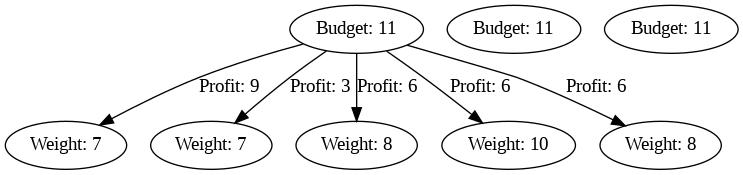

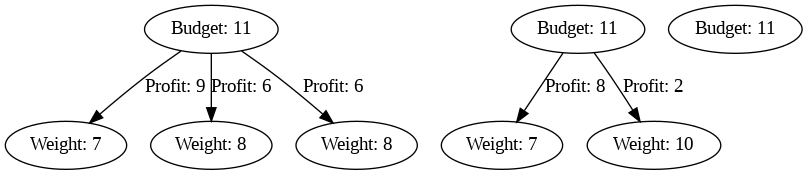

**`Frequency Assignment Problem`**

$n$ $=$ Total no. of transmitters

$m$ $=$ Total no. of availabale frequencies

$cᵢⱼ$ $=$ Interference cost or penalty associated with assigning frequency $j$ to transmitter $i$

$xᵢⱼ$ $=$ Binary decision variable indicating whether frequency $j$ is assigned to transmitter $i$

$xᵢⱼ=1$ (if frequency $j$ is assigned to transmitter $i$)

$xᵢⱼ=0$ (otherwise)



**Minimize**:  $\sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij} \cdot x_{ij}$

**Subject to**:

$
\sum_{j=1}^{m} x_{ij} = 1, \quad \forall i \in \{1,2,\ldots,n\}
$

$
\sum_{i=1}^{n} x_{ij} \leq 1, \quad \forall j \in \{1,2,\ldots,m\}
$

where \( $x_{ij} \in \{0, 1\}, \forall i \in \{1,2,\ldots,n\}, \forall j \in \{1,2,\ldots,m\}$


In [ ]:
import numpy as np
class AntColony:
    def __init__(self, num_transmitters, num_freq, cost_matrix, num_ants=10, alpha=1, beta=2, evaporation_rate=0.5, pheromone_init=1.0):
        self.num_transmitters = num_transmitters
        self.num_freq = num_freq
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.cost_matrix = cost_matrix
        self.pheromone_matrix = np.full((num_transmitters, num_freq), pheromone_init)
    def run_aco(self, num_iterations=100):
        for iteration in range(num_iterations):
            ants_solutions = self.generate_ant_solutions()
            self.update_pheromones(ants_solutions)
            self.evaporate_pheromones()
        best_solution = min(self.generate_ant_solutions(), key=lambda x: self.calculate_cost(x))
        return best_solution
    def generate_ant_solutions(self):
        ants_solutions = []
        for ant in range(self.num_ants):
            solution = self.construct_solution()
            ants_solutions.append(solution)
        return ants_solutions
    def construct_solution(self):
        solution = np.zeros((self.num_transmitters, self.num_freq))
        for transmitter in range(self.num_transmitters):
            prob_distribution = self.calculate_prob_distribution(transmitter, solution)
            chosen_freq = np.random.choice(self.num_freq, p=prob_distribution)
            solution[transmitter, chosen_freq] = 1
        return solution
    def calculate_prob_distribution(self, transmitter, solution):
        pheromones = self.pheromone_matrix[transmitter]
        interference_costs = self.cost_matrix[transmitter] * (1 - solution[transmitter])
        total_costs = np.power(pheromones, self.alpha) * np.power(1 / (1 + interference_costs), self.beta)
        prob_distribution = total_costs / total_costs.sum()
        return prob_distribution
    def update_pheromones(self, ants_solutions):
        pheromone_delta = np.zeros((self.num_transmitters, self.num_freq))
        for ant_solution in ants_solutions:
            cost = self.calculate_cost(ant_solution)
            for transmitter in range(self.num_transmitters):
                for freq in range(self.num_freq):
                    pheromone_delta[transmitter, freq] += 1 / cost if ant_solution[transmitter, freq] == 1 else 0
        self.pheromone_matrix = (1 - self.evaporation_rate) * self.pheromone_matrix + pheromone_delta
    def evaporate_pheromones(self):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
    def calculate_cost(self, solution):
        return np.sum(self.cost_matrix * solution)
num_transmitters = 5
num_freq = 10
cost_matrix = np.random.rand(num_transmitters, num_freq)
aco_solver = AntColony(num_transmitters, num_freq, cost_matrix)
best_solution = aco_solver.run_aco(num_iterations=100)
print("Best Solution =")
print(best_solution)
print("Total Cost =", aco_solver.calculate_cost(best_solution))

Best Solution =
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Total Cost = 0.40827464320852835


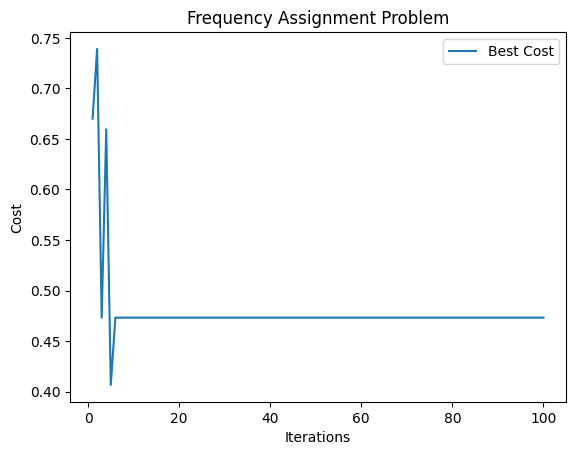

Best Solution =
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Total Cost = 0.4731506392253678


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class AntColony:
    def __init__(self, num_transmitters, num_freq, cost_matrix, num_ants=10, alpha=1, beta=2, evaporation_rate=0.5, pheromone_init=1.0):
        self.num_transmitters = num_transmitters
        self.num_freq = num_freq
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.cost_matrix = cost_matrix
        self.pheromone_matrix = np.full((num_transmitters, num_freq), pheromone_init)
        self.iteration_costs = []
    def run_aco(self, num_iterations=100):
        for iteration in range(num_iterations):
            ants_solutions = self.generate_ant_solutions()
            self.update_pheromones(ants_solutions)
            self.evaporate_pheromones()
            best_solution = min(ants_solutions, key=lambda x: self.calculate_cost(x))
            self.iteration_costs.append(self.calculate_cost(best_solution))
        self.plot_iteration_costs()
        return best_solution
    def plot_iteration_costs(self):
        plt.plot(range(1, len(self.iteration_costs) + 1), self.iteration_costs, label='Best Cost')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title('Frequency Assignment Problem')
        plt.legend()
        plt.show()
    def generate_ant_solutions(self):
        ants_solutions = []
        for ant in range(self.num_ants):
            solution = self.construct_solution()
            ants_solutions.append(solution)
        return ants_solutions
    def construct_solution(self):
        solution = np.zeros((self.num_transmitters, self.num_freq))
        for transmitter in range(self.num_transmitters):
            prob_distribution = self.calculate_prob_distribution(transmitter, solution)
            chosen_freq = np.random.choice(self.num_freq, p=prob_distribution)
            solution[transmitter, chosen_freq] = 1
        return solution
    def calculate_prob_distribution(self, transmitter, solution):
        pheromones = self.pheromone_matrix[transmitter]
        interference_costs = self.cost_matrix[transmitter] * (1 - solution[transmitter])
        total_costs = np.power(pheromones, self.alpha) * np.power(1 / (1 + interference_costs), self.beta)
        prob_distribution = total_costs / total_costs.sum()
        return prob_distribution
    def update_pheromones(self, ants_solutions):
        pheromone_delta = np.zeros((self.num_transmitters, self.num_freq))
        for ant_solution in ants_solutions:
            cost = self.calculate_cost(ant_solution)
            for transmitter in range(self.num_transmitters):
                for freq in range(self.num_freq):
                    pheromone_delta[transmitter, freq] += 1 / cost if ant_solution[transmitter, freq] == 1 else 0
        self.pheromone_matrix = (1 - self.evaporation_rate) * self.pheromone_matrix + pheromone_delta
    def evaporate_pheromones(self):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
    def calculate_cost(self, solution):
        return np.sum(self.cost_matrix * solution)
num_transmitters = 5
num_freq = 10
cost_matrix = np.random.rand(num_transmitters, num_freq)
aco_solver = AntColony(num_transmitters, num_freq, cost_matrix)
best_solution = aco_solver.run_aco(num_iterations=100)
print("Best Solution =")
print(best_solution)
print("Total Cost =", aco_solver.calculate_cost(best_solution))

Best Solution =
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Total Cost = 0.4535018187657177


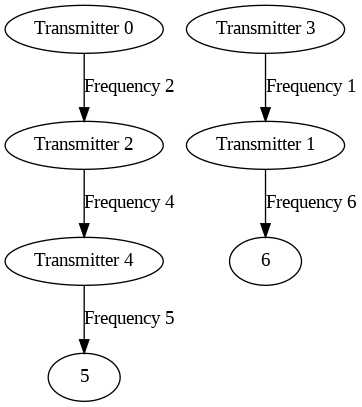

In [ ]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image
class AntColony:
    def __init__(self, num_transmitters, num_freq, cost_matrix, num_ants=10, alpha=1, beta=2, evaporation_rate=0.5, pheromone_init=1.0):
        self.num_transmitters = num_transmitters
        self.num_freq = num_freq
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.cost_matrix = cost_matrix
        self.pheromone_matrix = np.full((num_transmitters, num_freq), pheromone_init)
    def run_aco(self, num_iterations=100):
        for iteration in range(num_iterations):
            ants_solutions = self.generate_ant_solutions()
            self.update_pheromones(ants_solutions)
            self.evaporate_pheromones()
        best_solution = min(self.generate_ant_solutions(), key=lambda x: self.calculate_cost(x))
        return best_solution
    def generate_ant_solutions(self):
        ants_solutions = []
        for ant in range(self.num_ants):
            solution = self.construct_solution()
            ants_solutions.append(solution)
        return ants_solutions
    def construct_solution(self):
        solution = np.zeros((self.num_transmitters, self.num_freq))
        for transmitter in range(self.num_transmitters):
            prob_distribution = self.calculate_prob_distribution(transmitter, solution)
            chosen_freq = np.random.choice(self.num_freq, p=prob_distribution)
            solution[transmitter, chosen_freq] = 1
        return solution
    def calculate_prob_distribution(self, transmitter, solution):
        pheromones = self.pheromone_matrix[transmitter]
        interference_costs = self.cost_matrix[transmitter] * (1 - solution[transmitter])
        total_costs = np.power(pheromones, self.alpha) * np.power(1 / (1 + interference_costs), self.beta)
        prob_distribution = total_costs / total_costs.sum()
        return prob_distribution
    def update_pheromones(self, ants_solutions):
        pheromone_delta = np.zeros((self.num_transmitters, self.num_freq))
        for ant_solution in ants_solutions:
            cost = self.calculate_cost(ant_solution)
            for transmitter in range(self.num_transmitters):
                for freq in range(self.num_freq):
                    pheromone_delta[transmitter, freq] += 1 / cost if ant_solution[transmitter, freq] == 1 else 0
        self.pheromone_matrix = (1 - self.evaporation_rate) * self.pheromone_matrix + pheromone_delta
    def evaporate_pheromones(self):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
    def calculate_cost(self, solution):
        return np.sum(self.cost_matrix * solution)
    def visualize_solution(self, solution):
        G = pgv.AGraph(directed=True)
        for transmitter in range(self.num_transmitters):
            G.add_node(transmitter, label=f'Transmitter {transmitter}')
        for transmitter in range(self.num_transmitters):
            assigned_freq = np.where(solution[transmitter] == 1)[0]
            for freq in assigned_freq:
                G.add_edge(transmitter, freq, label=f'Frequency {freq}')
        G.layout(prog='dot')
        file_path = 'frequency_assignment_problem_aco_soln.png'
        G.draw(file_path)
        return Image(file_path)
num_transmitters = 5
num_freq = 10
cost_matrix = np.random.rand(num_transmitters, num_freq)
aco_solver = AntColony(num_transmitters, num_freq, cost_matrix)
best_solution = aco_solver.run_aco(num_iterations=100)
print("Best Solution =")
print(best_solution)
print("Total Cost =", aco_solver.calculate_cost(best_solution))
aco_solver.visualize_solution(best_solution)

In [ ]:
import numpy as np
import plotly.graph_objects as go
class AntColony:
    def __init__(self, num_transmitters, num_freq, cost_matrix, num_ants=10, alpha=1, beta=2, evaporation_rate=0.5, pheromone_init=1.0):
        self.num_transmitters = num_transmitters
        self.num_freq = num_freq
        self.num_ants = num_ants
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_init = pheromone_init
        self.cost_matrix = cost_matrix
        self.pheromone_matrix = np.full((num_transmitters, num_freq), pheromone_init)
    def run_aco(self, num_iterations=100):
        for iteration in range(num_iterations):
            ants_solutions = self.generate_ant_solutions()
            self.update_pheromones(ants_solutions)
            self.evaporate_pheromones()
        best_solution = min(self.generate_ant_solutions(), key=lambda x: self.calculate_cost(x))
        return best_solution
    def generate_ant_solutions(self):
        ants_solutions = []
        for ant in range(self.num_ants):
            solution = self.construct_solution()
            ants_solutions.append(solution)
        return ants_solutions
    def construct_solution(self):
        solution = np.zeros((self.num_transmitters, self.num_freq))
        for transmitter in range(self.num_transmitters):
            prob_distribution = self.calculate_prob_distribution(transmitter, solution)
            chosen_freq = np.random.choice(self.num_freq, p=prob_distribution)
            solution[transmitter, chosen_freq] = 1
        return solution
    def calculate_prob_distribution(self, transmitter, solution):
        pheromones = self.pheromone_matrix[transmitter]
        interference_costs = self.cost_matrix[transmitter] * (1 - solution[transmitter])
        total_costs = np.power(pheromones, self.alpha) * np.power(1 / (1 + interference_costs), self.beta)
        prob_distribution = total_costs / total_costs.sum()
        return prob_distribution
    def update_pheromones(self, ants_solutions):
        pheromone_delta = np.zeros((self.num_transmitters, self.num_freq))
        for ant_solution in ants_solutions:
            cost = self.calculate_cost(ant_solution)
            for transmitter in range(self.num_transmitters):
                for freq in range(self.num_freq):
                    pheromone_delta[transmitter, freq] += 1 / cost if ant_solution[transmitter, freq] == 1 else 0
        self.pheromone_matrix = (1 - self.evaporation_rate) * self.pheromone_matrix + pheromone_delta
    def evaporate_pheromones(self):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
    def calculate_cost(self, solution):
        return np.sum(self.cost_matrix * solution)
    def visualize_solution(self, solution):
        fig = go.Figure()
        for transmitter in range(self.num_transmitters):
            assigned_freq = np.where(solution[transmitter] == 1)[0]
            for freq in assigned_freq:
                fig.add_trace(go.Scatter3d(
                    x=[transmitter],
                    y=[freq],
                    z=[self.calculate_cost(solution)],
                    mode='markers',
                    marker=dict(
                        size=10,
                        color='blue',
                        opacity=0.8
                    ),
                    text=f'Transmitter {transmitter}, Frequency {freq}'
                ))
        fig.update_layout(
            scene=dict(
                xaxis_title='Transmitters',
                yaxis_title='Frequencies',
                zaxis_title='Total Cost',
            ),
            margin=dict(l=0, r=0, b=0, t=0)
        )
        fig.show()
num_transmitters = 5
num_freq = 10
cost_matrix = np.random.rand(num_transmitters, num_freq)
aco_solver = AntColony(num_transmitters, num_freq, cost_matrix)
best_solution = aco_solver.run_aco(num_iterations=100)
print("Best Solution =")
print(best_solution)
print("Total Cost =", aco_solver.calculate_cost(best_solution))
aco_solver.visualize_solution(best_solution)

Best Solution =
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Total Cost = 0.432800791163911


**`Redundancy Allocation Problem`**

$R_{ij}$ $=$ Reliability improvement factor due to redundancy for subsystem $i$ at level $j$

$C_{ij}$ $=$ Cost associated with allocating a redundant component to subsystem $i$ at level $j$

$B$ $=$ Budget constraint on the total cost of redundancy allocation


**Minimize**: $Z = \sum_{i}\sum_{j} R_{ij} x_{ij}$

**Subject to**:

$
\sum_{i}\sum_{j} R_{ij}\cdot x_{ij} \geq R_{\text{target}}
$

$
\sum_{i}\sum_{j} C_{ij} \cdot x_{ij} \leq B
$

where $x_{ij} \in \{0, 1\}$.


In [ ]:
import numpy as np
num_subsystems = 5
num_levels = 3
R_target = 0.95
budget = 1000
pheromone_initial = 1.0
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
num_ants = 10
max_iterations = 100
R = np.random.rand(num_subsystems, num_levels)
C = np.random.rand(num_subsystems, num_levels)
pheromone = np.full((num_subsystems, num_levels), pheromone_initial)
best_solution = None
best_objective = float('-inf')
for iteration in range(max_iterations):
    solutions = []
    for ant in range(num_ants):
        solution = np.zeros((num_subsystems, num_levels), dtype=int)
        for j in range(num_levels):
            probabilities = (pheromone[:, j] ** alpha) * ((1 / C[:, j]) ** beta)
            probabilities /= probabilities.sum()
            for i in range(num_subsystems):
                if np.random.rand() < probabilities[i]:
                    solution[i, j] = 1
        solutions.append(solution)
    for ant, solution in enumerate(solutions):
        objective = np.sum(R * solution)
        cost = np.sum(C * solution)
        if cost <= budget and objective > best_objective:
            best_objective = objective
            best_solution = solution
        pheromone *= (1 - evaporation_rate)
        pheromone += solution / cost
print("Best Solution =")
print(best_solution)
print("Best Objective Value =", best_objective)

Best Solution =
[[0 1 0]
 [0 0 0]
 [1 1 1]
 [0 1 0]
 [1 1 0]]
Best Objective Value = 4.012347927704356


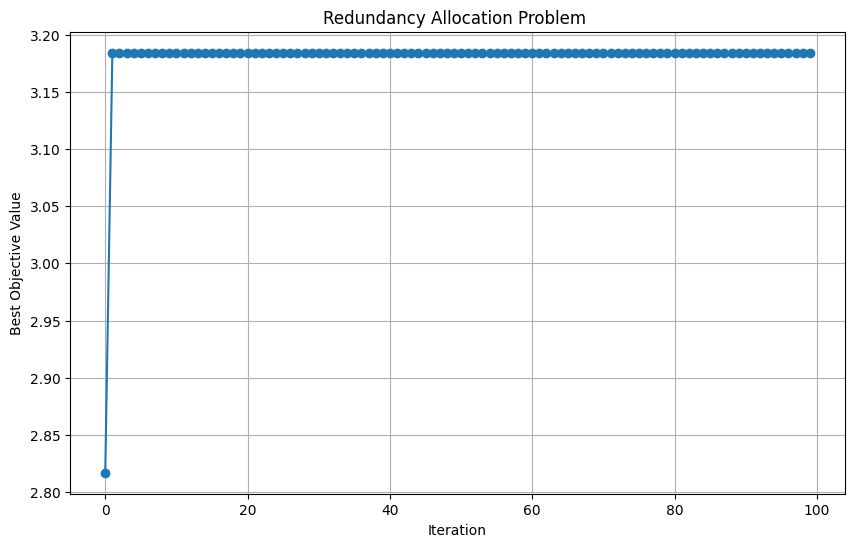

Best Solution =
[[0 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 0]
 [0 1 0]]
Best Objective Value = 3.1841151034060013


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
num_subsystems = 5
num_levels = 3
R_target = 0.95
budget = 1000
pheromone_initial = 1.0
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
num_ants = 10
max_iterations = 100
R = np.random.rand(num_subsystems, num_levels)
C = np.random.rand(num_subsystems, num_levels)
pheromone = np.full((num_subsystems, num_levels), pheromone_initial)
best_solution = None
best_objective = float('-inf')
iteration_list = []
best_objective_list = []
for iteration in range(max_iterations):
    solutions = []
    for ant in range(num_ants):
        solution = np.zeros((num_subsystems, num_levels), dtype=int)
        for j in range(num_levels):
            probabilities = (pheromone[:, j] ** alpha) * ((1 / C[:, j]) ** beta)
            probabilities /= probabilities.sum()
            for i in range(num_subsystems):
                if np.random.rand() < probabilities[i]:
                    solution[i, j] = 1
        solutions.append(solution)
    for ant, solution in enumerate(solutions):
        objective = np.sum(R * solution)
        cost = np.sum(C * solution)
        if cost <= budget and objective > best_objective:
            best_objective = objective
            best_solution = solution
        pheromone *= (1 - evaporation_rate)
        pheromone += solution / cost
    iteration_list.append(iteration)
    best_objective_list.append(best_objective)
plt.figure(figsize=(10, 6))
plt.plot(iteration_list, best_objective_list, marker='o', linestyle='-')
plt.title('Redundancy Allocation Problem ')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value')
plt.grid(True)
plt.show()
print("Best Solution =")
print(best_solution)
print("Best Objective Value =", best_objective)

In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 33 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgail18 amd64 2.24.33-2ubuntu2 [15.9 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64

In [ ]:
import numpy as np
import pygraphviz as pgv
from PIL import Image
num_subsystems = 5
num_levels = 3
R_target = 0.95
budget = 1000
pheromone_initial = 1.0
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
num_ants = 10
max_iterations = 100
R = np.random.rand(num_subsystems, num_levels)
C = np.random.rand(num_subsystems, num_levels)
pheromone = np.full((num_subsystems, num_levels), pheromone_initial)
best_solution = None
best_objective = float('-inf')
graph = pgv.AGraph(directed=True)
for iteration in range(max_iterations):
    solutions = []
    for ant in range(num_ants):
        solution = np.zeros((num_subsystems, num_levels), dtype=int)
        for j in range(num_levels):
            probabilities = (pheromone[:, j] ** alpha) * ((1 / C[:, j]) ** beta)
            probabilities /= probabilities.sum()
            for i in range(num_subsystems):
                if np.random.rand() < probabilities[i]:
                    solution[i, j] = 1
        solutions.append(solution)
    for ant, solution in enumerate(solutions):
        objective = np.sum(R * solution)
        cost = np.sum(C * solution)
        if cost <= budget and objective > best_objective:
            best_objective = objective
            best_solution = solution
        pheromone *= (1 - evaporation_rate)
        pheromone += solution / cost
        for i in range(num_subsystems):
            for j in range(num_levels):
                if solution[i, j] == 1:
                    graph.add_edge(f"Subsystem {i + 1}", f"Level {j + 1}")
graph_file_path = "redundancy_allocation_problem_aco_soln.png"
graph.draw(graph_file_path, format="png", prog="dot")
print("Best Solution:")
print(best_solution)
print("Best Objective Value:", best_objective)
img = Image.open(graph_file_path)
img.show()

Best Solution:
[[0 0 1]
 [1 1 0]
 [0 0 0]
 [0 1 0]
 [0 0 0]]
Best Objective Value: 3.0402485788417692


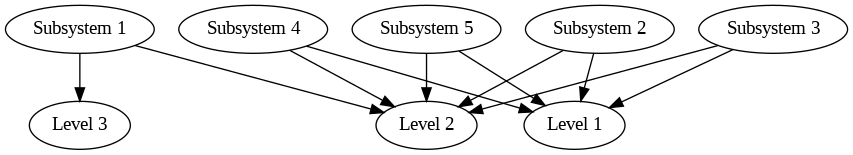

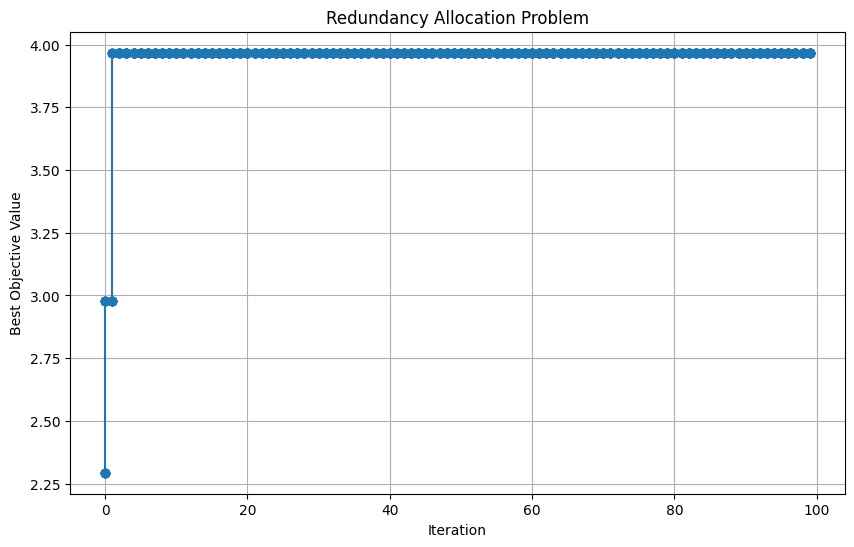

Best Solution =
[[0 1 0]
 [1 0 1]
 [0 1 1]
 [0 0 0]
 [0 0 1]]
Best Objective Value = 3.9672583336731533


In [ ]:
import numpy as np
import pygraphviz as pgv
from IPython.display import Image
import matplotlib.pyplot as plt
num_subsystems = 5
num_levels = 3
R_target = 0.95
budget = 1000
pheromone_initial = 1.0
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
num_ants = 10
max_iterations = 100
R = np.random.rand(num_subsystems, num_levels)
C = np.random.rand(num_subsystems, num_levels)
pheromone = np.full((num_subsystems, num_levels), pheromone_initial)
best_solution = None
best_objective = float('-inf')
iteration_list = []
best_objective_list = []
for iteration in range(max_iterations):
    solutions = []
    for ant in range(num_ants):
        solution = np.zeros((num_subsystems, num_levels), dtype=int)
        for j in range(num_levels):
            probabilities = (pheromone[:, j] ** alpha) * ((1 / C[:, j]) ** beta)
            probabilities /= probabilities.sum()
            for i in range(num_subsystems):
                if np.random.rand() < probabilities[i]:
                    solution[i, j] = 1
        solutions.append(solution)
    for ant, solution in enumerate(solutions):
        objective = np.sum(R * solution)
        cost = np.sum(C * solution)
        if cost <= budget and objective > best_objective:
            best_objective = objective
            best_solution = solution
        pheromone *= (1 - evaporation_rate)
        pheromone += solution / cost
        iteration_list.append(iteration)
        best_objective_list.append(best_objective)
plt.figure(figsize=(10, 6))
plt.plot(iteration_list, best_objective_list, marker='o', linestyle='-')
plt.title('Redundancy Allocation Problem')
plt.xlabel('Iteration')
plt.ylabel('Best Objective Value')
plt.grid(True)
plt.show()
graph = pgv.AGraph(directed=True)
for i in range(num_subsystems):
    graph.add_node(f'Subsystem_{i + 1}')
for i in range(num_subsystems):
    for j in range(num_levels):
        if best_solution[i, j] == 1:
            graph.add_edge(f'Subsystem_{i + 1}', f'Redundant_Component_{j + 1}')
graph_file_path = 'redundancy_allocation_graph.png'
graph.draw(graph_file_path, format='png', prog='dot')
Image(graph_file_path)
print("Best Solution =")
print(best_solution)
print("Best Objective Value =", best_objective)


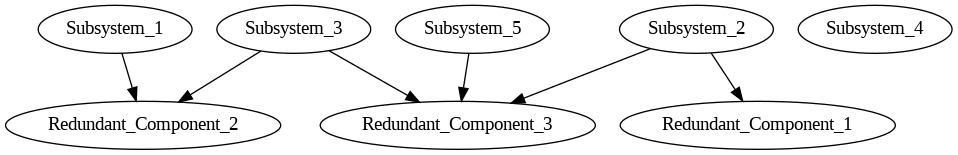

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import plotly.graph_objects as go
num_subsystems = 5
num_levels = 3
R_target = 0.95
budget = 1000
pheromone_initial = 1.0
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
num_ants = 10
max_iterations = 100
R = np.random.rand(num_subsystems, num_levels)
C = np.random.rand(num_subsystems, num_levels)
pheromone = np.full((num_subsystems, num_levels), pheromone_initial)
best_solution = None
best_objective = float('-inf')
for iteration in range(max_iterations):
    solutions = []
    for ant in range(num_ants):
        solution = np.zeros((num_subsystems, num_levels), dtype=int)
        for j in range(num_levels):
            probabilities = (pheromone[:, j] ** alpha) * ((1 / C[:, j]) ** beta)
            probabilities /= probabilities.sum()
            for i in range(num_subsystems):
                if np.random.rand() < probabilities[i]:
                    solution[i, j] = 1
        solutions.append(solution)
    for ant, solution in enumerate(solutions):
        objective = np.sum(R * solution)
        cost = np.sum(C * solution)
        if cost <= budget and objective > best_objective:
            best_objective = objective
            best_solution = solution
        pheromone *= (1 - evaporation_rate)
        pheromone += solution / cost
fig = go.Figure()
for j in range(num_levels):
    x_values = list(range(1, num_subsystems + 1))
    y_values = [j + 1] * num_subsystems
    z_values = best_solution[:, j]
    trace = go.Scatter3d(
        x=x_values,
        y=y_values,
        z=z_values,
        mode='markers',
        marker=dict(size=8, color=z_values, colorscale='Jet', opacity=0.8),
        name=f'Redundancy Level {j+1}'
    )
    fig.add_trace(trace)
fig.update_layout(
    scene=dict(
        aspectmode="cube",
        xaxis=dict(title='Subsystem', backgroundcolor='lightblue', gridcolor='black'),
        yaxis=dict(title='Redundancy Level', backgroundcolor='lightblue', gridcolor='black'),
        zaxis=dict(title='Allocation', backgroundcolor='lightblue', gridcolor='black'),
    ),
    scene_bgcolor='rgba(0, 0, 0, 0)',
)
fig.show()